In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import the dataset
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
#get set size
df.shape

(200, 6)

In [4]:
df.dtypes


Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
#data preprocessing
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [8]:
#target variable
#predictingvariable and type of drug to be recommended
y = df["Drug"].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [9]:
df["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [10]:
#converting categorical variables to numerical variables
#sklearn decision trees handles numerical values
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [11]:
from sklearn import preprocessing
sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
X[:,1] = sex.transform(X[:,1]) 


BP = preprocessing.LabelEncoder()
BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = BP.transform(X[:,2])


Chol = preprocessing.LabelEncoder()
Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [12]:
#split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=4)

#train and test sizes

print("Train set:",X_train.shape,y_train.shape)
print("Test set:",X_test.shape,y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


In [14]:
#creating an instance of the model
model = DecisionTreeClassifier(criterion = "entropy",max_depth=4)
model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
#fit the model to the training set
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
#predicting values with the model
yhat = model.predict(X_test)

In [19]:
#model accuracy evaluation
from sklearn.metrics import accuracy_score

print("Train set accuracy:",metrics.accuracy_score(y_train,model.predict(X_train)))
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

<IPython.core.display.Javascript object>

Train set accuracy: 1.0


<IPython.core.display.Javascript object>

Test set accuracy: 0.95


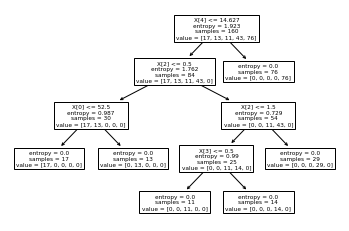

In [24]:
#visualise the resulting tree diagram
import sklearn.tree as tree
tree.plot_tree(model)
plt.show()